# Hypothesis testing problems

## Exercise 1

You are a nutritionist researching two different types of diets to see if there is a significant difference in weight loss after one month. You choose two random groups of people; one group follows the first diet, and the other follows the second. At the end of the month, you record the weight loss (in kg) for each person:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

With these data, it seeks to answer the following question: Is there a significant difference in average weight loss between people who followed the first diet and those who followed the second diet?

To draw conclusions, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the test to test the hypothesis. You can use a Student's t-test.
- Analyze the conclusions.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Data for the two diets
diet1 = [2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5]
diet2 = [3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2]

# Perform Levene's test for equal variances
levene_stat, levene_p = stats.levene(diet1, diet2)  

alpha = 0.05

# Check Levene's test result
if levene_p < alpha:
    print(f"The p-value of Levene's test ({levene_p:.3f}) is less than the significance level ({alpha}).")
    print("We reject the null hypothesis of equal variances (use Welch's t-test).")
else:
    print(f"The p-value of Levene's test ({levene_p:.3f}) is greater than or equal to the significance level ({alpha}).")
    print("We fail to reject the null hypothesis of equal variances (use pooled t-test).")

# Perform the appropriate t-test
if levene_p < alpha:
    t_stat, p_value = stats.ttest_ind(diet1, diet2, equal_var=False)  # Welch's t-test
    print("\nUsing Welch's t-test (unequal variances):")
else:
    t_stat, p_value = stats.ttest_ind(diet1, diet2, equal_var=True)  # Pooled t-test
    print("\nUsing Pooled t-test (equal variances):")

print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.4f}")

# Interpret the result
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis (significant difference in weight loss).")
else:
    print("Conclusion: Fail to reject the null hypothesis (no significant difference).")

The p-value of Levene's test (0.158) is greater than or equal to the significance level (0.05).
We fail to reject the null hypothesis of equal variances (use pooled t-test).

Using Pooled t-test (equal variances):
t-statistic: -3.538
p-value: 0.0041
Conclusion: Reject the null hypothesis (significant difference in weight loss).


## ANOVA

**ANOVA** (*Analysis of Variance*) is a statistical technique used to compare the measures of two or more groups. The idea behind ANOVA is to decompose the total variability in the data into two components: between-group variability and within-group variability:

- **Between-group variability**: This variability refers to the differences between the group means. If this variability is considerably larger than the within-group variability, it could be an indication that at least one of the group means is different.
- **Within-group variability**: This variability refers to the dispersion of the data within each group. If all groups have similar variability, then any noticeable difference in group means could be considered significant.

Hypotheses in ANOVA typically include:

- **Null hypothesis** ($H₀$): The means of all groups are equal.
- **Alternative hypothesis** ($H₁$): At least one of the group means is different.

If the ANOVA test result is significant (e.g., a p-value less than a threshold such as 0.05), this suggests that at least one group mean is different.

## Exercise 2

A farmer decides to test three different types of fertilizers to determine if one is superior in terms of corn production. The farmer plants corn on 15 identical plots and uses all three fertilizers (5 plots for each type). At the end of the season, he measures the corn yield (in kg) of each plot, with the following result:

| Fertilizer 1 | Fertilizer 2 | Fertilizer 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

With this data, he seeks to answer the following question: Is there a significant difference in average corn yield between the three types of fertilizers?

To help you, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the ANOVA test.
- Analyze the conclusions.
- If one fertilizer is better than another, how can we know it?

Null hypothesis (H 
0
​
 ): There is no significant difference in the average corn yield between the three types of fertilizers.  In other words, μ 
1
​
 =μ 
2
​
 =μ 
3
​
 , where μi  
​
    represents the population mean yield for fertilizer type i.

Alternative hypothesis (H 
1
​
 ): At least one of the fertilizer types results in a different average corn yield.  In other words, not all μ 
i
​
  are equal.

ANOVA F-statistic: 20.316
ANOVA P-value: 0.000


/tmp/ipykernel_519/1127577017.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([fertilizer1, fertilizer2, fertilizer3], labels=['Fertilizer 1', 'Fertilizer 2', 'Fertilizer 3'])


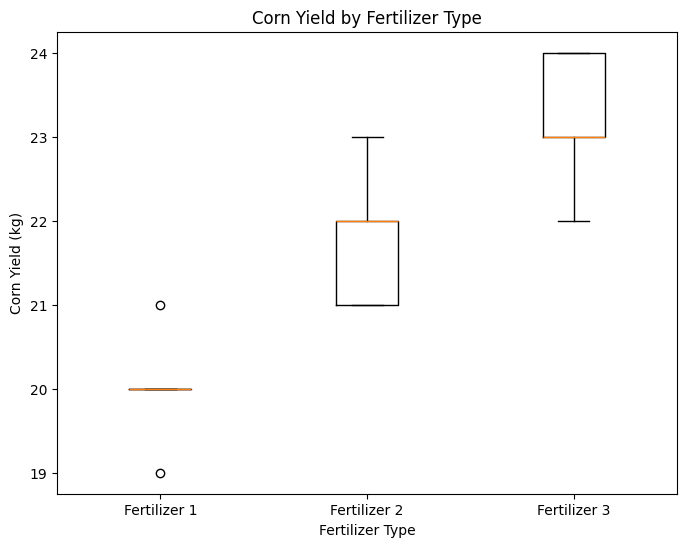

In [2]:
import scipy.stats as stats
import numpy as np
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Data for corn yield (kg) for each fertilizer type
fertilizer1 = np.array([20, 21, 20, 19, 20])
fertilizer2 = np.array([22, 21, 23, 22, 21])
fertilizer3 = np.array([24, 23, 22, 23, 24])

# Perform the ANOVA test
f_statistic, p_value = stats.f_oneway(fertilizer1, fertilizer2, fertilizer3)

# Print the results
print(f"ANOVA F-statistic: {f_statistic:.3f}")
print(f"ANOVA P-value: {p_value:.3f}")

# Create a DataFrame for post-hoc testing and visualization
data = {'Fertilizer': ['Fertilizer 1'] * 5 + ['Fertilizer 2'] * 5 + ['Fertilizer 3'] * 5,
        'Yield': list(fertilizer1) + list(fertilizer2) + list(fertilizer3)}
df = pd.DataFrame(data)

# Visualization
plt.figure(figsize=(8, 6))
plt.boxplot([fertilizer1, fertilizer2, fertilizer3], labels=['Fertilizer 1', 'Fertilizer 2', 'Fertilizer 3'])
plt.title('Corn Yield by Fertilizer Type')
plt.xlabel('Fertilizer Type')
plt.ylabel('Corn Yield (kg)')
plt.show()
